# Airplane Analysis
## Overview
My company is planning to expand into the aircraft industry, and is interested in purchasing and operating airplanes for both commercial and private enterprises. Since this is a novel business venture for the organization, an analysis of aircraft data has been conducted in order to identify potential risks and acquire useful insights that the company can utilize as it diversifies its portfolio.

## Business Understanding
The objective of this analysis is to determine if delving into the aircraft industry is worthwhile for the company, and to dentify which types of aircrafts the company should purchase to reduce risks.
To achieve this, the following questions were investigated:

1. What is the trend of aircraft accidents and fatalities over the years?
2. At which phases of flight are accidents more likely to occur? Which phases result in more fatalities and which phases result in more damage to the aircraft?
3. Is there a relation between number of engines in an aircraft and fatalities incase of an accident?

## Data Understanding, Preparation and Analysis
For this analysis, I used a dataset from the National Transportation Safety Board that includes accident data from 1962 to 2023. The data contains records of civil aviation accidents and selected incidents in the USA and international waters.

### Loading the Data

In [183]:
# Importing required modules and libraries

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

In [184]:
# Loading the dataset into a DataFrame
df = pd.read_csv('Data/Aviation_Data.csv')
df.head()

c:\Users\USER\anaconda3\envs\learn-env\lib\site-packages\IPython\core\interactiveshell.py:3145: DtypeWarning: Columns (6,7,28) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,


,Event.Id,Investigation.Type,Accident.Number,Event.Date,Location,Country,Latitude,Longitude,Airport.Code,Airport.Name,...,Purpose.of.flight,Air.carrier,Total.Fatal.Injuries,Total.Serious.Injuries,Total.Minor.Injuries,Total.Uninjured,Weather.Condition,Broad.phase.of.flight,Report.Status,Publication.Date
0,20001218X45444,Accident,SEA87LA080,1948-10-24,"MOOSE CREEK, ID",United States,NaN,NaN,NaN,NaN,...,Personal,NaN,2.0,0.0,0.0,0.0,UNK,Cruise,Probable Cause,NaN
1,20001218X45447,Accident,LAX94LA336,1962-07-19,"BRIDGEPORT, CA",United States,NaN,NaN,NaN,NaN,...,Personal,NaN,4.0,0.0,0.0,0.0,UNK,Unknown,Probable Cause,19-09-1996
2,20061025X01555,Accident,NYC07LA005,1974-08-30,"Saltville, VA",United States,36.9222,-81.8781,NaN,NaN,...,Personal,NaN,3.0,NaN,NaN,NaN,IMC,Cruise,Probable Cause,26-02-2007
3,20001218X45448,Accident,LAX96LA321,1977-06-19,"EUREKA, CA",United States,NaN,NaN,NaN,NaN,...,Personal,NaN,2.0,0.0,0.0,0.0,IMC,Cruise,Probable Cause,12-09-2000
4,20041105X01764,Accident,CHI79FA064,1979-08-02,"Canton, OH",United States,NaN,NaN,NaN,NaN,...,Personal,NaN,1.0,2.0,NaN,0.0,VMC,Approach,Probable Cause,16-04-1980


In [185]:
# Displaying the rows and columns of the data
df.shape

(90348, 31)

In [186]:
# Displaying the colmn names
df.columns

Index(['Event.Id', 'Investigation.Type', 'Accident.Number', 'Event.Date',
       'Location', 'Country', 'Latitude', 'Longitude', 'Airport.Code',
       'Airport.Name', 'Injury.Severity', 'Aircraft.damage',
       'Aircraft.Category', 'Registration.Number', 'Make', 'Model',
       'Amateur.Built', 'Number.of.Engines', 'Engine.Type', 'FAR.Description',
       'Schedule', 'Purpose.of.flight', 'Air.carrier', 'Total.Fatal.Injuries',
       'Total.Serious.Injuries', 'Total.Minor.Injuries', 'Total.Uninjured',
       'Weather.Condition', 'Broad.phase.of.flight', 'Report.Status',
       'Publication.Date'],
      dtype='object')

In [187]:
# Formating column names to strip whitespaces, convert to lowercase and replace '.' with '_'
df.columns = df.columns.str.strip().str.lower().str.replace('.', '_')

In [188]:
# Displaying general information about the dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 90348 entries, 0 to 90347
Data columns (total 31 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   event_id                88889 non-null  object 
 1   investigation_type      90348 non-null  object 
 2   accident_number         88889 non-null  object 
 3   event_date              88889 non-null  object 
 4   location                88837 non-null  object 
 5   country                 88663 non-null  object 
 6   latitude                34382 non-null  object 
 7   longitude               34373 non-null  object 
 8   airport_code            50249 non-null  object 
 9   airport_name            52790 non-null  object 
 10  injury_severity         87889 non-null  object 
 11  aircraft_damage         85695 non-null  object 
 12  aircraft_category       32287 non-null  object 
 13  registration_number     87572 non-null  object 
 14  make                    88826 non-null

The dataset contains 90,348 records with 31 columns.
There are a number of columns such as `event_date`, `aircraft_damage` and `number_of_engines` have missing values.

For ease of analysis, only the columns of interest will be retained.

In [189]:
# Creating a new DataFrame with only the columns of interest
aviation_data = df.loc[:, ['investigation_type', 'event_date', 'aircraft_damage', 'number_of_engines', 'total_fatal_injuries', 'broad_phase_of_flight']]
aviation_data.head()

,investigation_type,event_date,aircraft_damage,number_of_engines,total_fatal_injuries,broad_phase_of_flight
0,Accident,1948-10-24,Destroyed,1.0,2.0,Cruise
1,Accident,1962-07-19,Destroyed,1.0,4.0,Unknown
2,Accident,1974-08-30,Destroyed,1.0,3.0,Cruise
3,Accident,1977-06-19,Destroyed,1.0,2.0,Cruise
4,Accident,1979-08-02,Destroyed,NaN,1.0,Approach


### Missing Values

Most columns in the `aviation_data` DataFrame have missing values. The percentage of missing values in each column is indicated below.

In [190]:
aviation_data.isna().sum().map(lambda x: f"{round((x/aviation_data.shape[0])*100, 2)}%")

investigation_type         0.0%
event_date                1.61%
aircraft_damage           5.15%
number_of_engines         8.35%
total_fatal_injuries     14.23%
broad_phase_of_flight    31.68%
dtype: object

#### Dropping Rows with Missing Values
Records with missing values in the `event_date` column are displayed below.

In [96]:
aviation_data.loc[aviation_data['event_date'].isna()]

,investigation_type,event_date,aircraft_damage,number_of_engines,total_fatal_injuries,broad_phase_of_flight
64030,25-09-2020,NaN,NaN,NaN,NaN,NaN
64050,25-09-2020,NaN,NaN,NaN,NaN,NaN
64052,25-09-2020,NaN,NaN,NaN,NaN,NaN
64388,25-09-2020,NaN,NaN,NaN,NaN,NaN
64541,25-09-2020,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...
90004,15-12-2022,NaN,NaN,NaN,NaN,NaN
90010,15-12-2022,NaN,NaN,NaN,NaN,NaN
90031,15-12-2022,NaN,NaN,NaN,NaN,NaN
90090,20-12-2022,NaN,NaN,NaN,NaN,NaN


It seems that most records missing the event date are also missing values in the other columns. In that case, dropping these records will not result in any loss of data.

In [191]:
# Dropping rows with missing event date
aviation_data.dropna(subset=['event_date'], inplace=True)

#### Replacing Missing Values with Appropriate Category Name
Below are the categories present in the `aircraft_damage` column.

In [192]:
# Displaying unique values in aircraft_damage column
aviation_data['aircraft_damage'].unique()

array(['Destroyed', 'Substantial', 'Minor', nan, 'Unknown'], dtype=object)

Aside from the missing values in this column, there is another category labelled 'Unknown'. The missing values in `aircraft_damage` column can therefore be replaced with the value 'Unknown'.

In [193]:
# Replacing missing values in the column with 'Unknown'
aviation_data['aircraft_damage'].fillna(value='Unknown', inplace=True)

The same observation can be made for the `broad_phase_of_flight` column, and therefore the same treatment of missing values is applied.

In [194]:
# Displaying unique values in broad_phase_of_flight column
aviation_data['broad_phase_of_flight'].unique()

array(['Cruise', 'Unknown', 'Approach', 'Climb', 'Takeoff', 'Landing',
       'Taxi', 'Descent', 'Maneuvering', 'Standing', 'Go-around', 'Other',
       nan], dtype=object)

In [195]:
# Replacing missing values in the column with 'Unknown'
aviation_data['broad_phase_of_flight'].fillna(value='Unknown', inplace=True)

#### Imputing Missing Values
Next, the distribution of data in the `number_of_engines` column is observed with the use of a histogram.

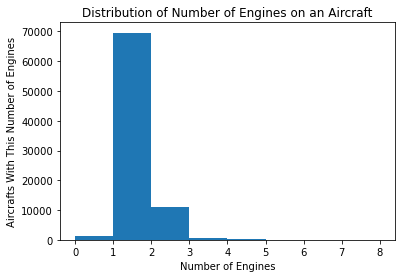

In [196]:
# Plotting a histogram to view the distribution of number of engines
aviation_data['number_of_engines'].plot(kind='hist', bins=8)

plt.title('Distribution of Number of Engines on an Aircraft')
plt.xlabel('Number of Engines')
plt.ylabel('Aircrafts With This Number of Engines');

In [197]:
# Printing the mean and median
print(f"mean: {aviation_data['number_of_engines'].mean()}")
print(f"median: {aviation_data['number_of_engines'].median()}")

mean: 1.1465853511261397
median: 1.0


The distribution of `number_of_engines` is slightly positively skewed, resulting in the mean being slightly greater than the median. To avoid altering the distribution of data in this column, the missing values are imputed with the median.

In [198]:
# Imputing missing values with the median
aviation_data['number_of_engines'].fillna(value=aviation_data['number_of_engines'].median(), inplace=True)

The distribution of data in the `total_fatal_injuries` column is now observed with the use of a boxplot.

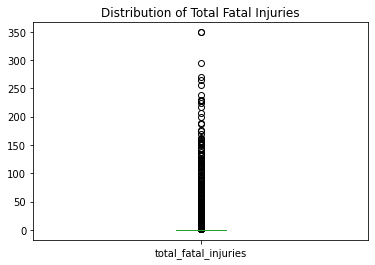

In [199]:
# Plotting a boxplot to view the distribution of total fatal injuries
aviation_data['total_fatal_injuries'].plot(kind='box')

plt.title('Distribution of Total Fatal Injuries');

In [200]:
# Printing the mean and median
print(f"mean: {aviation_data['total_fatal_injuries'].mean()}")
print(f"median: {aviation_data['total_fatal_injuries'].median()}")

mean: 0.6478551517654346
median: 0.0


Similarly, the distribution of `total_fatal_injuries` is positively skewed. In this case the missing values are also imputed with the median.

In [201]:
# Imputing missing values with the median
aviation_data['total_fatal_injuries'].fillna(value=aviation_data['total_fatal_injuries'].median(), inplace=True)

The missing values in our dataset have now been handled.

In [202]:
# Displaying percentage of missing values for each column
aviation_data.isna().sum().map(lambda x: f"{round((x/aviation_data.shape[0])*100, 2)}%")

investigation_type       0.0%
event_date               0.0%
aircraft_damage          0.0%
number_of_engines        0.0%
total_fatal_injuries     0.0%
broad_phase_of_flight    0.0%
dtype: object

As a final step of our data preparation, the datatype of the `event_date` column is changed from object to datetime, which is more appropriate for our analysis.

In [203]:
aviation_data['event_date'] = pd.to_datetime(aviation_data['event_date'])

In [204]:
aviation_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 88889 entries, 0 to 90347
Data columns (total 6 columns):
 #   Column                 Non-Null Count  Dtype         
---  ------                 --------------  -----         
 0   investigation_type     88889 non-null  object        
 1   event_date             88889 non-null  datetime64[ns]
 2   aircraft_damage        88889 non-null  object        
 3   number_of_engines      88889 non-null  float64       
 4   total_fatal_injuries   88889 non-null  float64       
 5   broad_phase_of_flight  88889 non-null  object        
dtypes: datetime64[ns](1), float64(2), object(3)
memory usage: 4.7+ MB


Now that the data is clean, our data analysis can begin.

#### Trend of aircraft accidents and fatalities over the years?
To answer our first question, a line graph is used to observe the trend of aircraft accidents and fatal injuries resulting from these accidents over the years.

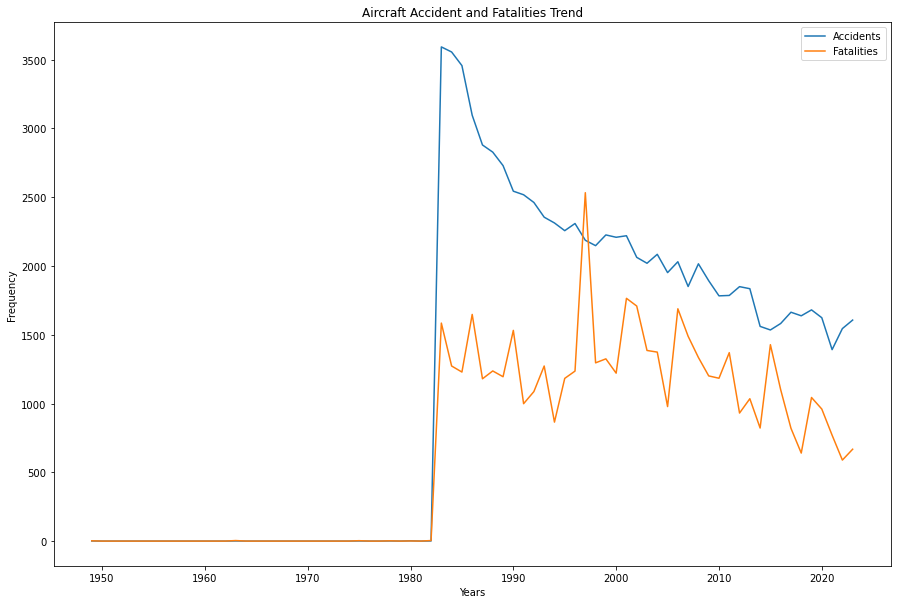

In [206]:
# Plotting a Line Graph to view the number of accidents and fatalities over the years
plt.figure(figsize=(15,10))

# Grouping the data by year
grouped_by_year = aviation_data.groupby(pd.Grouper(key='event_date', freq='Y')).agg({'investigation_type': 'count', 'total_fatal_injuries': 'sum'}).reset_index()

sns.lineplot(x='event_date', y='investigation_type', data=grouped_by_year, label='Accidents')
sns.lineplot(x='event_date', y='total_fatal_injuries', data=grouped_by_year, label='Fatalities')

plt.title('Aircraft Accident and Fatalities Trend')
plt.xlabel('Years')
plt.ylabel('Frequency')
plt.legend();

As indicated in the line graph above, the number of aircraft accidents continues to decrease over the years. Similarly, the number of fatal injuries has also reduced over the years.


#### Aircraft Accidents at Different Phases of Flight
The image below highlights different phases of flight for aircrafts. In this section, the total number of accidents that occurred in each phase of flight over the years were investigated. The number of fatal injuries and the level of damage done to the aircraft at each phase of flight was also investigated.

<p align="center">
  <img src="phases-of-flight.png" width="1000" height="430">
</p>

The bar graph below showcases the total number of accidents that have occurred at each phase of flight.

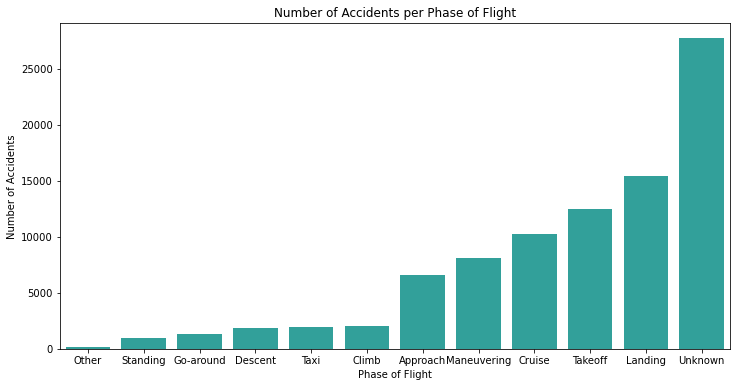

In [221]:
# Plotting a bar graph to show number of accidents thats have occurred in each phase
plt.figure(figsize=(12,6))

accidents_by_phase = aviation_data.groupby('broad_phase_of_flight').count()['investigation_type'].sort_values()

sns.barplot(x=accidents_by_phase.index, y=accidents_by_phase.values, color='lightseagreen')

plt.title('Number of Accidents per Phase of Flight')
plt.ylabel('Number of Accidents')
plt.xlabel('Phase of Flight');



From the bar chart above it seems that for most accidents in the dataset, the phase of flight in which the accient occurred was not known. However, this does not provide much information for the organization. For this reason, the focus shall be only on accidents whose phase of flight is known.

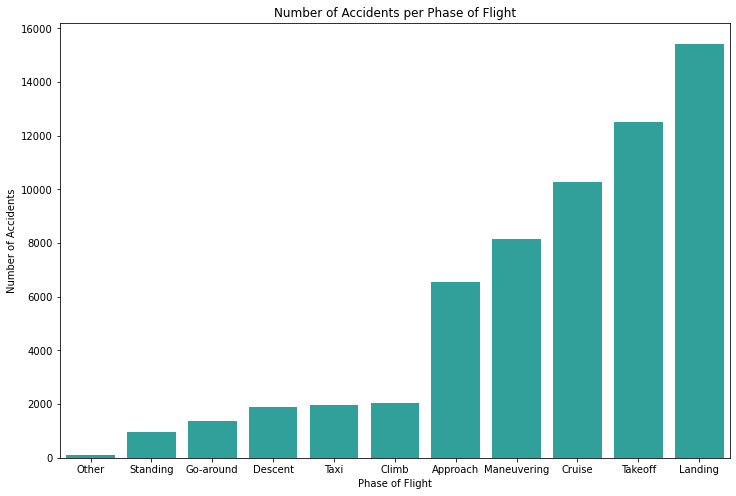

In [220]:
# Plotting a bar graph to show number of accidents that have occurred in each phase
plt.figure(figsize=(12,8))

# Filterin the data to only contain accidents whose phase of flight is known
accidents_at_unknown_phase = aviation_data.loc[aviation_data['broad_phase_of_flight']=='Unknown']
dropped_unknown_phase = aviation_data.drop(accidents_at_unknown_phase.index)
accidents_by_phase = dropped_unknown_phase.groupby('broad_phase_of_flight').count()['investigation_type'].sort_values()

sns.barplot(x=accidents_by_phase.index, y=accidents_by_phase.values, color='lightseagreen')

plt.title('Number of Accidents per Phase of Flight')
plt.ylabel('Number of Accidents')
plt.xlabel('Phase of Flight');

It appears most accidents occur at the Landing and Takeoff phases. These are the points at which the aircraft is transitioning from air to ground and from ground to air respectively. During these transitions there is little time for error correction. 

Now the bar chart below displays the number of fatal injuries recorded at each phase.

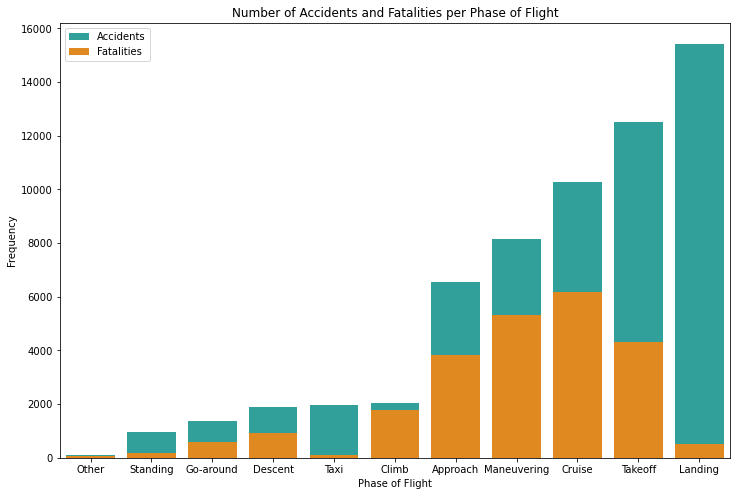

In [219]:
plt.figure(figsize=(12,8))

grouped_by_phase = dropped_unknown_phase.groupby('broad_phase_of_flight').agg({'investigation_type': 'count', 'total_fatal_injuries': 'sum'}).sort_values(by=['investigation_type'])

sns.barplot(x=grouped_by_phase.index, y='investigation_type',  data=grouped_by_phase, color='lightseagreen', label='Accidents')
sns.barplot(x=grouped_by_phase.index, y='total_fatal_injuries', data=grouped_by_phase, color='darkorange', label='Fatalities')

plt.title('Number of Accidents and Fatalities per Phase of Flight')
plt.ylabel('Frequency')
plt.xlabel('Phase of Flight')
plt.legend();

Although the Landing and Takeoff phases of flight have the most occurrences of accidents, very few of them result in fatalities. The highest number of fatalities is instead experienced in accidents that occur in the cruise phase. Although cruise is generally a safer phase of flight compared to Landing and Takeoff, the risk of fatalities is much higher when accidents occur.

Finally, the chart below shows the level of damage done to the plane at each phase.

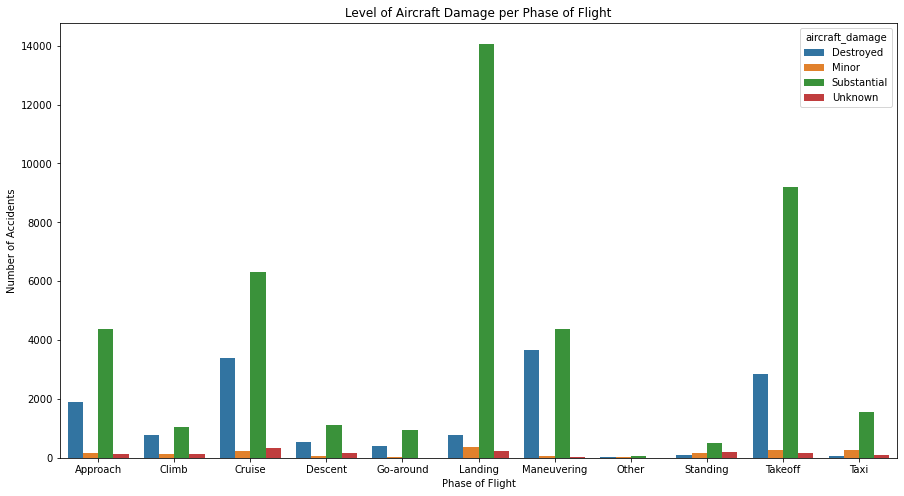

In [213]:
plt.figure(figsize=(15,8))

grouped_by_phase_and_damage = dropped_unknown_phase.groupby(['broad_phase_of_flight', 'aircraft_damage']).count().reset_index()

sns.barplot(x='broad_phase_of_flight', y='investigation_type', data=grouped_by_phase_and_damage, hue='aircraft_damage')

plt.title('Level of Aircraft Damage per Phase of Flight')
plt.ylabel('Number of Accidents')
plt.xlabel('Phase of Flight');

As noted earlier, most accidents occur at the Landing and Takeoff phase of flight. In addition to this, it seems that in the occurence of these accidents, a substantial amount of damage is done to the aircraft. For the phases that have a higher risk of having fatalities (Cruise, Maneuvering), the aircrafts tend to be destroyed in the event of an accident.

#### Relation between number of engines in an aircraft and fatalities in the occurrence of an accident
Finally, an analysis was done to investigate if there is any relation between the number of engines in an aircraft and the fatalities in the event of an accident. The bar graph below shows the number of engines in an aircraft and the number of fatal injuries for aircrafts with that number of engines.

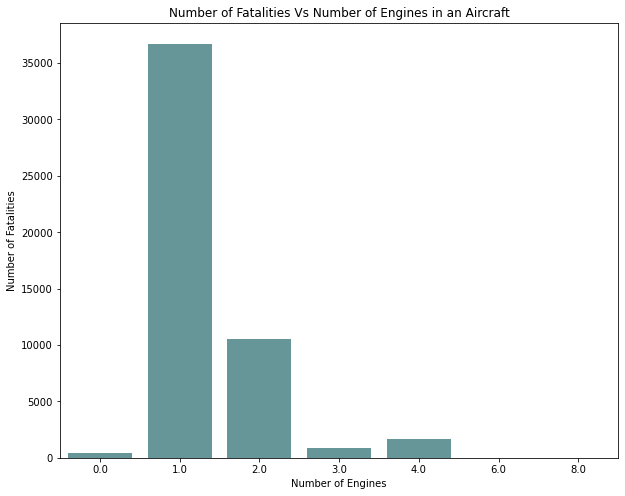

In [222]:
plt.figure(figsize=(10,8))

fatalities_vs_num_engines = aviation_data.groupby('number_of_engines').sum().reset_index()

sns.barplot(x='number_of_engines', y='total_fatal_injuries', data=fatalities_vs_num_engines, color='cadetblue')

plt.title('Number of Fatalities Vs Number of Engines in an Aircraft')
plt.xlabel('Number of Engines')
plt.ylabel('Number of Fatalities');

It can be observed that the highest number of fatalities occurs when the aircraft has only one engine.

### Conclusion
It is said that airplanes are the safest mode of transportation. Indeed, it can be observed from this analysis that the number of aircraft accidents and fatalities have significantly reduced over the years.

However, it is important to note situations that lead to occurrences of these accidents. From this analysis, it's apparent that majority of aircraft accidents occur at the Landing phase of flight and the Takeoff phase of flight. This means that aircrafts are at the highest risk of crashing at the beginning and the end of a flight, when pilots have little time to react if something goes wrong. Additionally, aircrafts are also more likely to experience turbulence and bird strikes at these low altitudes. It is also in these phases of flight where the aircrafts are substantially damaged in the event of an accident. However, it is rather encouraging to note that the number of fatalities recorded in these two phases are quite low.

The analysis also shows that there is a higher risk of fatal injuries in accidents that involve aircrafts with only one engine while those with more than one engine have less fatal injuries.

In conclusion, the aircraft industry is a worthwhile business venture for the company given that a lot of effort has been put into advancing the technology used in airplanes to make them safer. Investing in aircrafts that have sophisticated auto-pilot and auto-landing systems will be beneficial as this will enhance flight precision and reduce number of accidents at Landing and Takeoff. Finally, it is also advisable for the company to invest in aircrafts that have at least two engines, to further reduce the risk of fatalities.